<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe7-CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del corte de varilla

**Entrada**: Largo de varilla $n$, más un vector de precios por cada medida $i=1...n$

**Salida**: Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes, más un arreglo $C$ con los cortes necesarios para este retorno.

La **programación dinámica** es un método para resolver problemas que se basa en la descomposición y resolución de subproblemas más pequeños. A diferencia de la técnica **divide y vencerás**, la programación dinámica hace uso de las soluciones obtenidas para los problemas más pequeños con el fin de facilitar la resolución de los problemas más grandes y complejos.

Para aplicar la técnica de programación dinámica debemos, en primer lugar, identificar una **subestructura óptima** para el problema que queremos resolver, esto es, dividir el problema de entrada en subproblemas cuyas soluciones sean aplicables a la resolución del problema original. El siguiente paso consiste en encontrar una solución recursiva al problema, en base a la subestructura óptima encontrada en el paso anterior. Una vez hecho esto, nuestro objetivo será transformar esta solución de modo que cada subproblema repetido se resuelva una única vez durante todo el proceso del algoritmo. Para lograrlo, podemos guardar las soluciones para cada subproblema y simplemente acceder a ellas en caso de que el problema se repita, sin necesidad de volver a resolverlo.

Uno de los problemas más conocidos para entender el concepto de programación dinámica es el problema del **corte de varilla**, el cual se analizará en este informe. Este problema consiste en optimizar el valor máximo que se puede obtener cortando una varilla de largo $n$, a partir de una tabla de precios en función del largo de la varilla. Como veremos más adelante, resolver este problema mediante programación dinámica es mucho más conveniente que utilizar una solución recursiva, la cual muchas veces resulta ineficiente en cuanto al tiempo de ejecución del algoritmo.



# 2. Corte de varilla

## 2.1 Código

El siguiente código muestra una implementación recursiva para resolver el problema del corte de varilla. 

In [ ]:
from termcolor import colored

def recursive_cutting_rod(P,n,verbose=False,first_call=True):
  global calls
  calls = calls + 1

  if verbose == True and first_call == True:
    print(f"Vector de precios P = {P}")
    print(f"Largo de varilla a optimizar: {n}\n")
  else:
    verbose = False  

  # Caso base: el retorno máximo es 0 para una varilla de largo 0
  if n == 0:
    return 0, []

  r_max = 0 # Guarda el retorno máximo para la varilla de largo n
  c_max = [] # Guarda los cortes necesarios para la varilla de largo n

  for i in range(1, n+1):
    # Se calcula el retorno máximo para cada subproblema
    r_prev, cuts = recursive_cutting_rod(P,n-i,verbose,False)

    # El retorno actual es igual a r_prev más el precio de la parte restante
    r = P[i-1] + r_prev

    # Se añade el corte de la iteración actual al arreglo cuts
    if n-i != 0 or first_call == False:
      cuts.append(i)

    # Se actualiza el retorno máximo y los cortes a la varilla 
    if r > r_max:
      r_max = r
      c_max = cuts

    if verbose == True:
      print(f"Retorno máximo para varilla de largo {n-i} = ({colored(r_prev, 'magenta')})")
      print(f"Precio para varilla de largo {i} = ({colored(P[i-1], 'green')})")
      print(f"Retorno obtenido = {colored(r_prev, 'magenta')} + {colored(P[i-1], 'green')} = {colored(r, 'blue')}")
      print(f"Cortes necesarios: {colored(cuts, 'grey')}")
      print(f"Retorno máximo actual = {r_max}\n")

  if verbose == True:
    print(f"Retorno máximo: {r_max}")
    if len(c_max) == 0:
      print(f"Sin cortes")
    else:
      print(f"Cortes realizados: {c_max}")

  return r_max, c_max

P = [1,5,8,9,10,17,17,20,24,25]
n = 10
calls = 0

r, c = recursive_cutting_rod(P,10,False)

print(f"El retorno máximo es {r}")
print(f"Los cortes necesarios son {c}")
print(f"Cantidad de llamadas recursivas: {calls}")

El retorno máximo es 27
Los cortes necesarios son [6, 2, 2]
Cantidad de llamadas recursivas: 1024


In [ ]:
def dynamic_cutting_rod(P,n,verbose=False):
  T = [0] * (n+1) # Guarda el retorno máximo por cada varilla de largo i
  C = [0] * (n+1) # Guarda el índice donde se corta cada varilla de largo i

  if verbose == True:
    print(f"Vector de precios P = {P}")
    print(f"Largo de varilla a optimizar: {n}\n")
    print(f"Creando vector T para guardar retorno máximo por subproblema")
    print(f"Inicializando T en {T}\n")

  # Se encuentra el retorno máximo para cada varilla de largo i..n
  for i in range(1, n+1):

    if verbose == True:
      print(f"Resolviendo subproblema para varilla de largo {i}")
      print(f"T = {T}\n")

    for j in range(1, i+1):
      # El retorno es la suma del precio de una varilla de largo j
      # más el retorno máximo de la parte restante
      r = P[j-1] + T[i-j] 

      # Se guarda el retorno mayor en T[i] y el corte en C[i]
      if r > T[i]:
        T[i] = r
        C[i] = i-j

      if verbose == True:
        print(f"Cortando varilla en dos partes de largo {j} y {i-j}: ", end='')
        print(f"{colored(f'P[{j}]', 'green')} + ", end='')
        print(f"{colored(f'T[{i-j}]', 'magenta')} = ", end='')
        print(f"{colored(r, 'cyan')}")

    if verbose == True:
      print(f"Retorno máximo obtenido = {colored(T[i], 'blue')}\n")  

  # Guarda todos los cortes necesarios para una varilla de largo n
  cuts = [] 
  i = n

  while True:
    # No hay cortes
    if C[i] == 0:
      # Si la varilla ha sido cortada se guarda el largo de la parte actual
      if len(cuts) != 0: cuts.insert(0, i)
      break

    # Se guarda el largo de la subvarilla derecha
    cuts.insert(0, i-C[i])

    # En la siguiente iteración se procesa la subvarilla izquierda
    i = C[i]

  if verbose == True:
    print(f"Retorno máximo para varilla de largo {n} = ({colored(T[n], 'blue')})")
    if len(cuts) == 0:
      print(f"Sin cortes")
    else:
      print(f"Cortes realizados: {cuts}")

  return T[n], cuts

P = [1,5,8,9,10,17,17,20,24,25]
n = 10

r, c = dynamic_cutting_rod(P,10)

print(f"El retorno máximo es {r}")
print(f"Los cortes necesarios son {c}")

El retorno máximo es 27
Los cortes necesarios son [6, 2, 2]


## 2.2 Descripción del algoritmo

### Subestructura óptima y solución recursiva

Si analizamos el problema, podemos notar que para calcular el retorno máximo $r_{n}$ para una varilla de largo $n$, existen dos casos:

1. El retorno máximo $r_{n}$ coincide con el precio de la varilla completa, es decir, no se necesitan cortes para optimizar su valor.

2. El retorno máximo $r_{n}$ está dado por el precio $p_{i}$ de una subvarilla de largo $i$, más el retorno máximo de la varilla restante.

Lo anterior se puede representar en la siguiente imagen:

![picture](https://drive.google.com/uc?export=view&id=1NE6oeCZk7NquZLW4nd67YUYhK-MtVJPT)

Teniendo esto en cuenta, podemos observar que el problema para una varilla de largo $n$ se puede dividir en $n$ subproblemas distintos. Consideremos, por ejemplo, una varilla de largo 3. ¿Cómo podríamos calcular todos los posibles retornos para esta varilla?

$p_{1} + r_{2}$

$p_{2} + r_{1}$

$p_{3} + r_{0}$

Esto último, considerando que $r_{0} = 0$. Luego, 
podemos calcular el retorno máximo $r_{3}$ como el valor máximo que se obtiene entre estos 3 subproblemas. De manera general, $r_{n}$ se puede calcular mediante la siguiente función recursiva:

$r_n=\max\limits_{i=1..n}(p_i+r_{n-i})$

Una vez que hemos encontrado una **subestructura óptima** y una **solución recursiva** al problema, podemos plantear un nuevo algoritmo que resuelva convenientemente cada subproblema, con el fin de evitar resolver problemas repetidos por cada llamada recursiva.

### Descripción de la solución (programación dinámica)

Aplicando el paradigma de la **programación dinámica**, podemos crear el siguiente algoritmo, que resuelve de manera eficiente el problema del corte de varilla. La entrada consiste en un arreglo $P$ con los precios para cada varilla de largo $i = 1..n$, más un parámetro $n$ que corresponde a la longitud de la varilla a calcular el retorno máximo $r_n$.

1. Se crea un vector $T$ de largo $n$ inicializado con ceros para guardar la solución obtenida para cada subproblema.

2. Se resuelve el problema para cada varilla de largo $i$ en orden creciente, comenzando desde $i = 1$.

3. Se calculan todos los retornos posibles para el subproblema $i$ mediante la fórmula $r_{i}(j) = P_{j} + T_{i-j}$, para cada $j = 1..i$

4. Se guarda el retorno máximo $r_{i}$ en $T_{i}$.

5. El algoritmo finaliza una vez se resuelve el problema para una varilla de largo $i = n$.

## 2.3 Ejemplo

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso de ambos algoritmos.



In [ ]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

### Cutting Rod (recursivo)

In [ ]:
P = cutrod_instance_generator(5)
r = recursive_cutting_rod(P,5,True)

Vector de precios P = [5, 14, 24, 28, 31]
Largo de varilla a optimizar: 5

Retorno máximo para varilla de largo 4 = (29)
Precio para varilla de largo 1 = (5)
Retorno obtenido = 29 + 5 = 34
Cortes necesarios: [3, 1, 1]
Retorno máximo actual = 34

Retorno máximo para varilla de largo 3 = (24)
Precio para varilla de largo 2 = (14)
Retorno obtenido = 24 + 14 = 38
Cortes necesarios: [3, 2]
Retorno máximo actual = 38

Retorno máximo para varilla de largo 2 = (14)
Precio para varilla de largo 3 = (24)
Retorno obtenido = 14 + 24 = 38
Cortes necesarios: [2, 3]
Retorno máximo actual = 38

Retorno máximo para varilla de largo 1 = (5)
Precio para varilla de largo 4 = (28)
Retorno obtenido = 5 + 28 = 33
Cortes necesarios: [1, 4]
Retorno máximo actual = 38

Retorno máximo para varilla de largo 0 = (0)
Precio para varilla de largo 5 = (31)
Retorno obtenido = 0 + 31 = 31
Cortes necesarios: []
Retorno máximo actual = 38

Retorno máximo: 38
Cortes realizados: [3, 2]


### Cutting Rod (bottom-up)

In [ ]:
P = cutrod_instance_generator(5)
r = dynamic_cutting_rod(P,5,True)

Vector de precios P = [5, 9, 18, 20, 20]
Largo de varilla a optimizar: 5

Creando vector T para guardar retorno máximo por subproblema
Inicializando T en [0, 0, 0, 0, 0, 0]

Resolviendo subproblema para varilla de largo 1
T = [0, 0, 0, 0, 0, 0]

Cortando varilla en dos partes de largo 1 y 0: P[1] + T[0] = 5
Retorno máximo obtenido = 5

Resolviendo subproblema para varilla de largo 2
T = [0, 5, 0, 0, 0, 0]

Cortando varilla en dos partes de largo 1 y 1: P[1] + T[1] = 10
Cortando varilla en dos partes de largo 2 y 0: P[2] + T[0] = 9
Retorno máximo obtenido = 10

Resolviendo subproblema para varilla de largo 3
T = [0, 5, 10, 0, 0, 0]

Cortando varilla en dos partes de largo 1 y 2: P[1] + T[2] = 15
Cortando varilla en dos partes de largo 2 y 1: P[2] + T[1] = 14
Cortando varilla en dos partes de largo 3 y 0: P[3] + T[0] = 18
Retorno máximo obtenido = 18

Resolviendo subproblema para varilla de largo 4
T = [0, 5, 10, 18, 0, 0]

Cortando varilla en dos partes de largo 1 y 3: P[1] + T[3] = 23


# 3. Correctitud

### **Teorema 1: Correctitud de Cutting Rod (bottom-up)**

*El algoritmo **Cutting Rod** retorna correctamente la ganancia máxima $r_n$ que se puede obtener al dividir una varilla de largo $n$ y vender sus partes.*

## Prueba del Teorema

Para demostrar la correctitud del algoritmo, demostraremos la hipótesis $P(n)$ utilizando inducción.

**Caso base**

Para $n = 1$, el algoritmo retorna el precio para una varilla de largo 1. Puesto que este es el tamaño mínimo que puede tener una varilla, esta no puede dividirse, y por lo tanto, existe un único caso para el valor de $r_n$

**Paso inductivo**

Para $n > 1$, se calcula la ganancia $r_{n}(j)$ para $j = 1..n$, donde $j$ corresponde al tamaño de todos los posibles subproblemas en que puede dividirse el problema original. La función $r_{n}(j)$ puede expresarse con la fórmula:

$r_{n}(j) = P_{j} + r_{n-j}$

donde $P_{j}$ corresponde al precio de una varilla de largo $j$, y $r_{n-j}$ es la ganancia máxima para una varilla de largo $n-j$.

Observemos que, por el paso inductivo, sabemos que la ganancia máxima para cualquier varilla de largo $n-j$, con $j \geq 1$, será calculada correctamente.

Al finalizar el algoritmo, se retorna el valor $r_n$ máximo de todos los valores obtenidos por la función $r_n(j)$. Puesto que la función $r_n(j)$ considera todos los subproblemas posibles que resultan al dividir el problema original, sabemos que uno de estos valores será el que maximice la solución buscada.

Como la hipótesis $P(n)$ se cumple para el **caso base** y para el **paso inductivo**, queda demostrada la correctitud del algoritmo Cutting Rod. $\Box$




# 4. Tiempo de ejecución

### **Teorema 2: Tiempo de ejecución del algoritmo Cutting Rod (bottom-up)**

*El algoritmo Cutting Rod tiene un **tiempo de ejecución** $O(n^2)$*

## Prueba del teorema




# 5. Experimentos

## 5.1. Comparación entre implementación recursiva y bottom-up

A continuación se presenta una comparación del tiempo de ejecución de ambos algoritmos. Para visualizar de forma clara la curva de tiempo que sigue cada algoritmo, se creará un gráfico para cada uno por separado, y finalmente, se elaborará un único gráfico para mostrar la diferencia de tiempo que existe entre ellos.

### Tiempo experimental de Cutting Rod (recursivo)

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,20]$

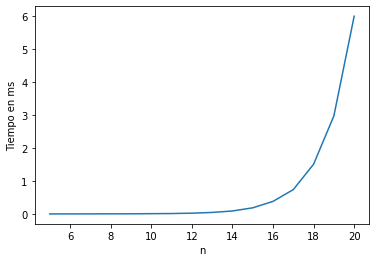

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y1=[];

for n in range(5,21):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import recursive_cutting_rod", stmt=f"recursive_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental de Cutting Rod (bottom-up)

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,500]$

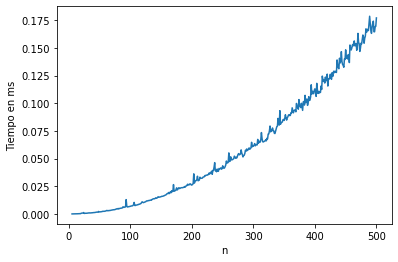

In [ ]:
x=[]; y1=[];

for n in range(5,501):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import dynamic_cutting_rod", stmt=f"dynamic_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental para ambos algoritmos

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,20]$

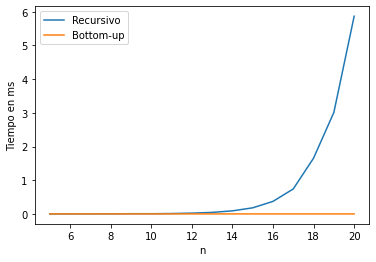

In [ ]:
x=[]; y1=[]; y2=[];

for n in range(5,21):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import recursive_cutting_rod", stmt=f"recursive_cutting_rod({P}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamic_cutting_rod", stmt=f"dynamic_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Bottom-up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados


## 5.2. Cantidad de subproblemas (bottom-up)

### Análisis de resultados

